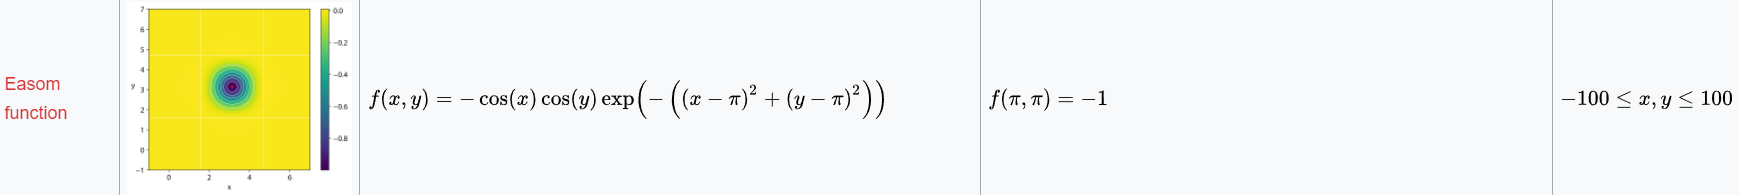

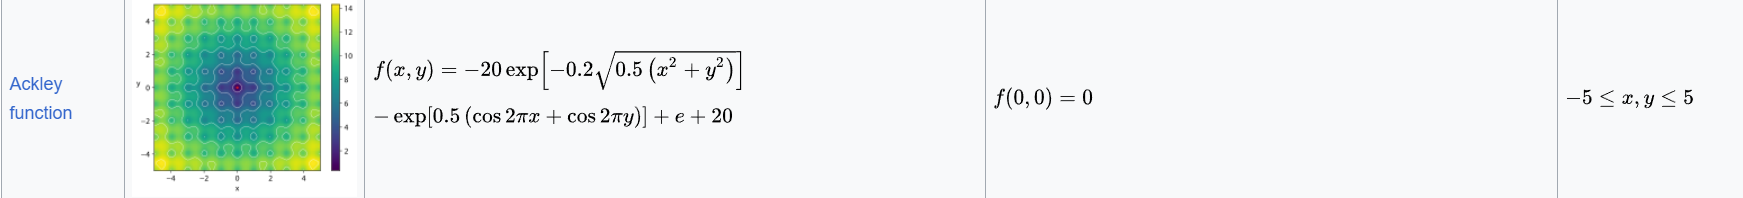

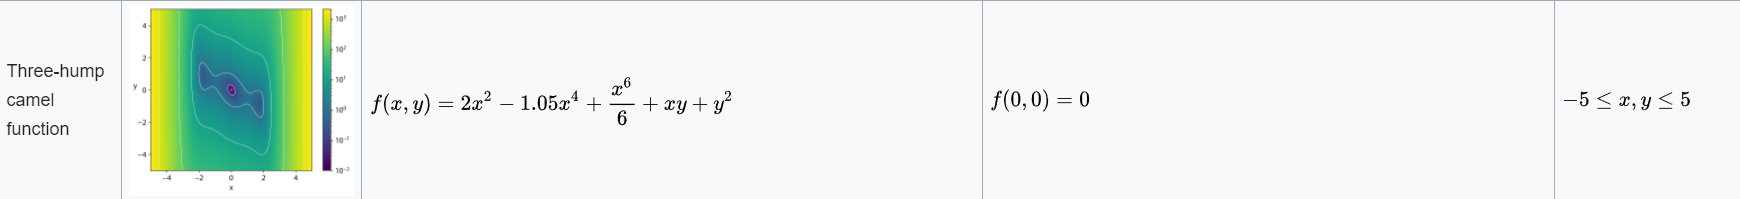

<h2><b>Functions

In [19]:
import math


def easom(array):
    x, y = array
    return (
        -math.cos(x)
        * math.cos(y)
        * math.exp(-((x - math.pi) ** 2 + (y - math.pi) ** 2))
    )


def ackley(array):
    x, y = array
    term1 = -20 * math.exp(-0.2 * math.sqrt(0.5 * (x**2 + y**2)))
    term2 = -math.exp(0.5 * (math.cos(2 * math.pi * x) + math.cos(2 * math.pi * y)))
    return term1 + term2 + math.e + 20


def camel(array):
    x, y = array
    return 2 * x**2 - 1.05 * x**4 + (x**6 / 6) + x * y + y**2

<h2><b>Binary operators

In [20]:
import struct


def float_to_binary(float_num):
    # pack the float as binary data (4 bytes)
    binary_data = struct.pack("f", float_num)

    # convert each byte to a binary string (8 bits per byte)
    binary_string = "".join(f"{byte:08b}" for byte in binary_data)

    return list(binary_string)


def binary_to_float(binary_list):
    # сombine the list of bits into one binary string
    binary_string = "".join(binary_list)

    # split the binary string into 8-bit chunks (1 byte)
    byte_chunks = [binary_string[i : i + 8] for i in range(0, len(binary_string), 8)]

    # convert each 8-bit chunk back into an integer (each value represents a byte)
    byte_values = [int(byte, 2) for byte in byte_chunks]

    # pack these bytes together into binary data, then unpack as a float
    binary_data = struct.pack("B" * len(byte_values), *byte_values)
    float_num = struct.unpack("f", binary_data)[0]

    return float_num

<h2><b>Crossover

In [21]:
import random


def crossover(parents, point_count=1):

    mom, dad = parents
    length = len(mom)

    if point_count == 1:
        # Single-point crossover
        pivot = random.randint(
            1, length - 1
        )  # choose a crossover point, avoid the start and end
        offspring1 = mom[:pivot] + dad[pivot:]
        offspring2 = dad[:pivot] + mom[pivot:]

    elif point_count == 2:
        # Two-point crossover
        pivot1, pivot2 = sorted(
            [random.randint(1, length - 1) for _ in range(2)]
        )  # ensure point 1 is less than point 2
        offspring1 = mom[:pivot1] + dad[pivot1:pivot2] + mom[pivot2:]
        offspring2 = dad[:pivot1] + mom[pivot1:pivot2] + dad[pivot2:]

    return [list(offspring1), list(offspring2)]

<h2><b>Mutation and Inversion

In [22]:
def mutation(genotype, mutation_chance):

    index = random.randint(0, len(genotype) - 1)


    chance = random.random()


    if chance < mutation_chance:


        genotype[index] = "1" if genotype[index] == "0" else "0"

    return genotype

In [23]:
def inversion(genotype, inversion_chance):
    if random.random() < inversion_chance:
        length = len(genotype)
        pivot1, pivot2 = sorted([random.randint(0, length - 1) for _ in range(2)])
        # reverse the segment between the two points
        genotype[pivot1 : pivot2 + 1] = genotype[pivot1 : pivot2 + 1][::-1]
    return genotype

<h2><b>Parents Selection

In [24]:
# Hamming distance function
def hamming_distance(genotype1, genotype2):
    return sum(bit1 != bit2 for bit1, bit2 in zip(genotype1, genotype2))

In [25]:
# Panmixia: Select two random parents
def panmixia(population, pop_fitness=None):
    return random.sample(population, 2)

In [26]:
# Inbreeding: First random, second with min Hamming distance
def inbreeding(population, pop_fitness=None):
    first_parent = random.choice(population)
    # Ensure second parent isn't the same as the first parent
    population_without_first = [ind for ind in population if ind != first_parent]
    second_parent = min(
        population_without_first, key=lambda ind: hamming_distance(first_parent, ind)
    )
    return [first_parent, second_parent]

In [27]:
# Outbreeding: First random, second with max Hamming distance
def outbreeding(population, pop_fitness=None):
    first_parent = random.choice(population)
    # Ensure second parent isn't the same as the first parent
    population_without_first = [ind for ind in population if ind != first_parent]
    second_parent = max(
        population_without_first, key=lambda ind: hamming_distance(first_parent, ind)
    )
    return [first_parent, second_parent]

In [28]:
# Selective Breeding: Parents with fitness below average fitness
def selective_breeding(population, pop_fitness):
    average_fitness = sum(pop_fitness) / len(pop_fitness)

    # Select parents with fitness below the average fitness
    below_average = [
        pop
        for pop, fitness in zip(population, pop_fitness)
        if fitness < average_fitness
    ]

    # If not enough parents below average fitness, use random selection
    if len(below_average) < 2:
        return random.sample(population, 2)

    return random.sample(below_average, 2)

<h2><b>Children Selection

In [29]:
# Normal Selection: Replace old population with new one
def normal_selection(parents, parent_fitness, offspring, offspring_fitness):
    return offspring

In [30]:
# Displacement Selection: only unique individuals in the new population
def displacement_selection(parents, parent_fitness, offspring, offspring_fitness):
    unique_offspring = set([tuple(ind) for ind in offspring])
    return list(unique_offspring)

In [31]:
# choose the fittest individuals out of parent + children population
def elite_selection(parents, parent_fitness, offspring, offspring_fitness):


    # combine parents and offspring into one pool

    combined_population = parents + offspring

    combined_fitness = parent_fitness + offspring_fitness


    # sort the combined population based on fitness

    phenotype_fitness = list(zip(combined_population, combined_fitness))

    phenotype_fitness = sorted(phenotype_fitness, key=lambda x: x[1])


    # select the best N individuals (half of the combined pool)

    best_individuals = phenotype_fitness[: len(parents)]

    return [individual[0] for individual in best_individuals]

<h2><b>Genetic Algorithm

In [32]:
def generate_indiv(function_constraints):
    res = []
    for i in range(len(function_constraints)):
        res.append(
            function_constraints[i][0]
            + random.random()
            * (function_constraints[i][1] - function_constraints[i][0])
        )

    return res

In [33]:
def apply_mutation_and_inversion(gene, mutation_chance, inversion_chance):
    gene = mutation(gene, mutation_chance)
    gene = inversion(gene, inversion_chance)
    return gene

In [34]:
def is_within_constraints(indiv, function_constraints):
    return all(
        function_constraints[i][0] <= indiv[i] <= function_constraints[i][1]
        for i in range(len(indiv))
    )

In [35]:
def genetic_algorithm(
    iterations,
    pop_count,
    num_children,
    crossover_point_count,
    mutation_chance,
    inversion_chance,
    function_constraints,
    fit_f,
    parent_selection,
    children_selection,
):
    # initial population
    population = [generate_indiv(function_constraints) for _ in range(pop_count)]

    overall_best_solution = None
    overall_best_fitness = float("inf")

    for i in range(iterations):
        # fitness for each indiv
        pop_fitness = [fit_f(indiv) for indiv in population]

        # binary convertion
        binary_population = [
            [float_to_binary(gene) for gene in indiv] for indiv in population
        ]

        # Parent selection
        parents = []
        while len(parents) < num_children:
            selected_parents = parent_selection(binary_population, pop_fitness)
            parents.extend(selected_parents)

        # Generate children using crossover
        children = []
        for i in range(0, len(parents), 2):
            parent1, parent2 = parents[i], parents[i + 1]
            offspring = crossover(
                [parent1, parent2], crossover_point_count
            )  # Pass both parents as a list
            children.extend(offspring)

        # mutate and invert each child
        # for i in range(len(children)):
        #     children[i] = [
        #         apply_mutation_and_inversion(gene, mutation_chance, inversion_chance)
        #         for gene in children[i]
        #     ]
        for i in range(len(children)):
            children[i] = apply_mutation_and_inversion(
                children[i], mutation_chance, inversion_chance
            )

        # convert children to float to calculate fitness
        children = [[binary_to_float(gene) for gene in child] for child in children]

        # check constraints for children
        for i in range(len(children)):
            while not is_within_constraints(children[i], function_constraints):
                children[i] = generate_indiv(function_constraints)

        children_fitness = [fit_f(child) for child in children]

        # Children selection
        population = children_selection(
            parents, pop_fitness, children, children_fitness
        )

        # best solution in the current population
        best_idx = children_fitness.index(min(children_fitness))
        current_best_solution = children[best_idx]
        current_best_fitness = children_fitness[best_idx]

        # Update overall best solution if the current one is better
        if current_best_fitness < overall_best_fitness:
            overall_best_solution = current_best_solution
            overall_best_fitness = current_best_fitness

        print(
            f"Iteration {i + 1}: Best solution: {current_best_solution}, Fitness: {current_best_fitness}"
        )

        # best solution in population
        # best_idx = pop_fitness.index(min(pop_fitness))
        # best_solution = population[best_idx]
        # best_fitness = pop_fitness[best_idx]
        # print(f"Best solution: {best_solution}, Fitness: {best_fitness}")
    print(
        f"Overall best solution: {overall_best_solution}, with fitness: {overall_best_fitness}"
    )

    return overall_best_solution, overall_best_fitness

In [36]:
# Run the genetic algorithm
best_solution, best_fitness = genetic_algorithm(
    iterations=100,
    pop_count=50,
    num_children=50,
    crossover_point_count=1,
    mutation_chance=0.1,
    inversion_chance=0.05,
    function_constraints=[(-100, 100), (-100, 100)],
    fit_f=easom,
    parent_selection=inbreeding,
    children_selection=normal_selection,
)
print(f"Best solution: {best_solution}, with fitness: {best_fitness}")

error: unpack requires a buffer of 4 bytes